In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = pd.read_excel("Financial Questionnaire (Responses).xlsx")
data

,Timestamp,Score,Why is a stock valuable?,"Someone makes $30,000 in a year and pays $5,000 in income tax that year. If the next year they make $60,000, how much will they pay in income tax?",Which of the following is the least risky investment,Inflation is:,Which of the following is the riskiest investment strategy?,What is your major?,What is your gender?,"In your opinion, how important is financial literacy?"
0,2016-10-26 21:54:04.548,5,It gives you the right to a portion of a corpo...,"more than $10,000",Treasury bills,An increase in the cost of living,Invest all of your money in one company,IE,Female,7.0
1,2016-10-26 21:54:04.554,4,It gives you the right to a portion of a corpo...,"more than $10,000",Treasury bills,A decrease in the cost of living,Invest all of your money in one company,CPE,Male,9.0
2,2016-10-26 21:55:41.323,3,It gives you the right to a portion of a corpo...,10000,Treasury bills,An increase in stock prices,Invest all of your money in one company,AGB,Toaster,10.0
3,2016-10-26 21:55:43.374,3,It gives you the right to a portion of a corpo...,10000,Corporate bonds,An increase in the cost of living,Invest all of your money in one company,Mechanical Engineering,Female,7.0
4,2016-10-26 21:57:11.405,2,It pays you a fixed amount of money every mont...,10000,Corporate bonds,An increase in the cost of living,Invest all of your money in one company,Grc,Female,6.0
5,2016-10-26 22:03:27.658,4,It gives you the right to a portion of a corpo...,10000,Treasury bills,An increase in the cost of living,Invest all of your money in one company,Biology/psychology,Female,10.0
6,2016-10-26 22:05:17.232,4,It gives you the right to a portion of a corpo...,"more than $10,000",Corporate bonds,An increase in the cost of living,Invest all of your money in one company,Biomedical engineering,Female,9.0
7,2016-10-26 22:05:29.878,3,It gives you the right to a portion of a corpo...,"more than $10,000",Stocks,An increase in stock prices,Invest all of your money in one company,Physics,Female,9.0
8,2016-10-26 22:06:52.341,3,It gives you the right to a portion of a corpo...,5000,Corporate bonds,An increase in the cost of living,Invest all of your money in one company,English,Female,6.0
9,2016-10-26 22:07:27.823,4,It gives you the right to a portion of a corpo...,10000,Treasury bills,An increase in the cost of living,Invest all of your money in one company,Biology,Female,10.0


In [24]:
#replace correct answers with True and incorrect ones with False
def grading_function(response, correct_answer):
    if response == correct_answer:
        return True
    else:
        return False
    
stock_value_grader = lambda resp: grading_function(resp, "It gives you the right to a portion of a corporation's assets and profits")
income_tax_grader = lambda resp: grading_function(resp, "more than $10,000")
least_risky_grader = lambda resp: grading_function(resp, "Treasury bills")
inflation_grader = lambda resp: grading_function(resp, "An increase in the cost of living")
riskiest_grader = lambda resp: grading_function(resp, "Invest all of your money in one company")

for (ix, func) in enumerate([stock_value_grader, income_tax_grader, least_risky_grader, inflation_grader, riskiest_grader]):
    data[data.columns[ix + 2]] = data[data.columns[ix + 2]].map(func)

# create percent correct column
data['Percent Correct'] = data['Score'] * 20.0
    
# make majors lowercase
data["What is your major?"] = data["What is your major?"].map(lambda x: x.lower().strip())


In [25]:
data

,Timestamp,Score,Why is a stock valuable?,"Someone makes $30,000 in a year and pays $5,000 in income tax that year. If the next year they make $60,000, how much will they pay in income tax?",Which of the following is the least risky investment,Inflation is:,Which of the following is the riskiest investment strategy?,What is your major?,What is your gender?,"In your opinion, how important is financial literacy?",Percent Correct
0,2016-10-26 21:54:04.548,5,True,True,True,True,True,ie,Female,7.0,100.0
1,2016-10-26 21:54:04.554,4,True,True,True,False,True,cpe,Male,9.0,80.0
2,2016-10-26 21:55:41.323,3,True,False,True,False,True,agb,Toaster,10.0,60.0
3,2016-10-26 21:55:43.374,3,True,False,False,True,True,mechanical engineering,Female,7.0,60.0
4,2016-10-26 21:57:11.405,2,False,False,False,True,True,grc,Female,6.0,40.0
5,2016-10-26 22:03:27.658,4,True,False,True,True,True,biology/psychology,Female,10.0,80.0
6,2016-10-26 22:05:17.232,4,True,True,False,True,True,biomedical engineering,Female,9.0,80.0
7,2016-10-26 22:05:29.878,3,True,True,False,False,True,physics,Female,9.0,60.0
8,2016-10-26 22:06:52.341,3,True,False,False,True,True,english,Female,6.0,60.0
9,2016-10-26 22:07:27.823,4,True,False,True,True,True,biology,Female,10.0,80.0


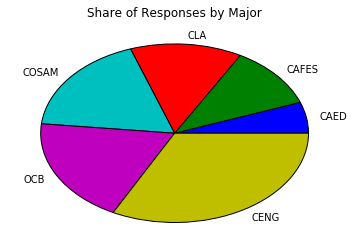

In [26]:
ag = "CAFES"
arc = "CAED"
cosam = "COSAM"
eng = "CENG"
lib = "CLA"
bus = "OCB"

major_to_college = {'ag systems management': ag,
                   'enve': eng,
                   'kinesiology': cosam,
                   'electrical engineering': eng,
                    'civil '
                   'ee': eng,
                   'computer science': eng,
                   'business': bus,
                    'business ': bus,
                   'biology': cosam,
                    'bio': cosam,
                    'econ': bus,
                    'statistics': cosam,
                    'eim': ag,
                    'environmental engineering': eng,
                    'finance': bus,
                    'chem': cosam,
                    'sociology': lib,
                    'cpe': eng,
                    'business administration': bus,
                    'envm': ag,
                    'food science': ag,
                    'ie': eng,
                    'biomedical engineering': eng,
                    'computer engineering': eng,
                    'industrial engineering': eng,
                    'mechanical engineering': eng,
                    'aerospace engineering': eng,
                    'me': eng,
                    'bmed': eng,
                    'art and design': lib,
                    'agb': ag,
                    'liberal studies': cosam,
                    'philosophy': lib,
                    'aerospace': eng,
                    'animal science': ag,
                    'mechanical enginner': eng,
                    'nutrition': ag,
                    'agribusiness': ag,
                    'agricultural business': ag,
                    'graphic communications': lib,
                    'physics': cosam,
                    'aero': eng,
                    'archetectural engineering': arc,
                    'laes': lib,
                    'ee': eng,
                    'cs': eng,
                    'economics': bus,
                    'journalism': lib,
                    'english': lib,
                    'grc': lib,
                    'architecture': arc,
                    'civil engineering': eng,
                    'architectural engineering': arc,
                    'biology/psychology': np.NAN,
                    'https://www.youtube.com/watch?v=dqw4w9wgxcq': np.NAN,
                    '✋🏻❓❗️❓what ❓ the fuck😡😠😡😠': np.NAN
                   }


data["What is your major?"] = data["What is your major?"].replace(major_to_college)

# plot number of responses from each major
ax = data.groupby(data.columns[7])[data.columns[7]].count().sort_values().plot('pie')
ax.set_ylabel('')
ax.set_title('Share of Responses by Major')


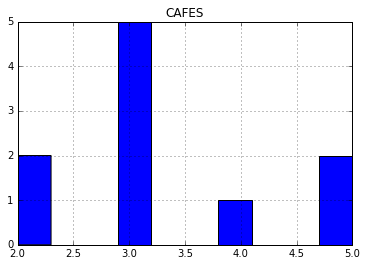

In [27]:
ax = data[data["What is your major?"] == ag]['Score'].hist()
ax.set_title(ag)

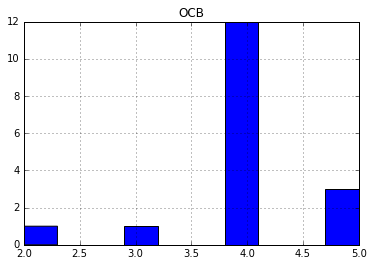

In [28]:
ax = data[data["What is your major?"] == bus]['Score'].hist()
ax.set_title(bus)

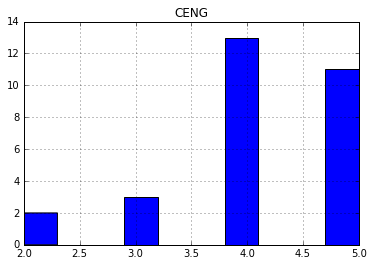

In [29]:
ax = data[data["What is your major?"] == eng]['Score'].hist()
ax.set_title(eng)

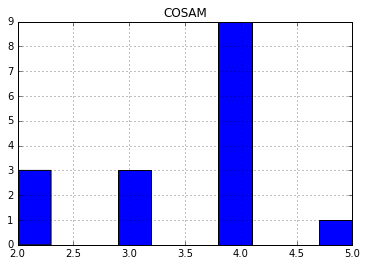

In [30]:
ax = data[data["What is your major?"] == cosam]['Score'].hist()
ax.set_title(cosam)

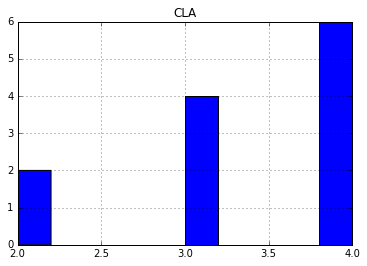

In [31]:
ax = data[data["What is your major?"] == lib]['Score'].hist()
ax.set_title(lib)

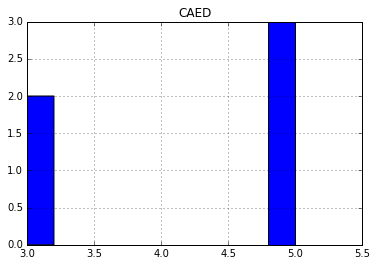

In [32]:
ax = data[data["What is your major?"] == arc]['Score'].hist()
ax.set_title(arc)

In [33]:
for major in [bus, lib, ag, arc, cosam, eng]:
    print(major, data[data["What is your major?"] == major]['Score'].mean())

OCB 4.0
CLA 3.33333333333
CAFES 3.3
CAED 4.2
COSAM 3.5
CENG 4.13793103448


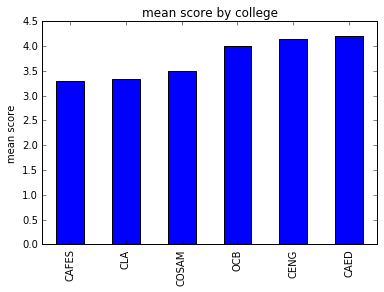

In [34]:
ax = data.groupby("What is your major?")['Score'].mean().sort_values().plot('bar')
ax.set_xlabel('')
ax.set_ylabel('mean score')
ax.set_title('mean score by college')

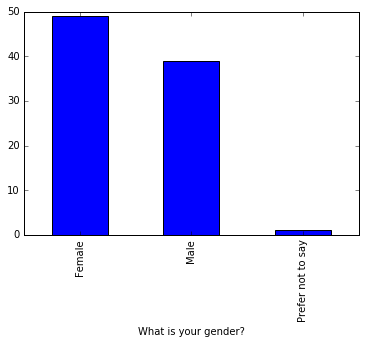

In [35]:
# remove bad responses to gender
def gender_filter(resp):
    if resp == 'Male' or resp == 'Female' or resp == 'Prefer not to say': 
        return resp 
    else:
        return np.NAN

data['What is your gender?'] = data['What is your gender?'].map(gender_filter)

ax = data.groupby('What is your gender?')['What is your gender?'].count().plot('bar')

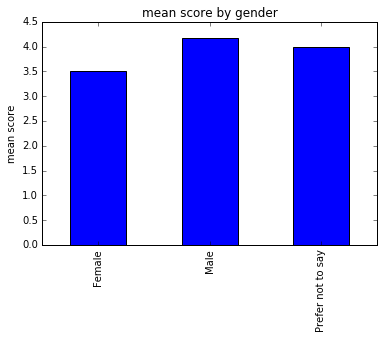

In [36]:
ax = data.groupby("What is your gender?")['Score'].mean().plot('bar')
ax.set_xlabel('')
ax.set_ylabel('mean score')
ax.set_title('mean score by gender')

In [37]:
gender_ratios = pd.crosstab(data["What is your major?"], data["What is your gender?"])
gender_ratios.groupby(level=0).apply(lambda x: x)

What is your gender?,Female,Male,Prefer not to say
What is your major?,,,
CAED,4,1,0
CAFES,7,2,0
CENG,12,17,0
CLA,10,1,1
COSAM,10,6,0
OCB,5,12,0


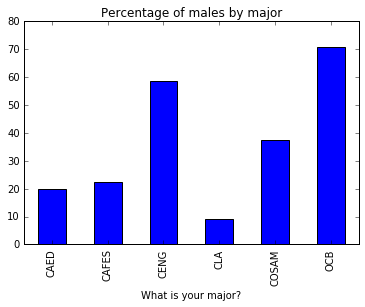

In [38]:
gender_ratios['Male to Female percentage'] = gender_ratios['Male']/(gender_ratios['Female'] + gender_ratios['Male']) * 100
ax = gender_ratios['Male to Female percentage'].plot('bar')
ax.set_title('Percentage of males by major')


In [39]:
data.groupby('What is your gender?')['In your opinion, how important is financial literacy?'].mean()

What is your gender?
Female               8.346939
Male                 8.615385
Prefer not to say    7.000000
Name: In your opinion, how important is financial literacy?, dtype: float64

In [40]:
data.groupby("What is your gender?")['Score'].mean()

What is your gender?
Female               3.510204
Male                 4.179487
Prefer not to say    4.000000
Name: Score, dtype: float64

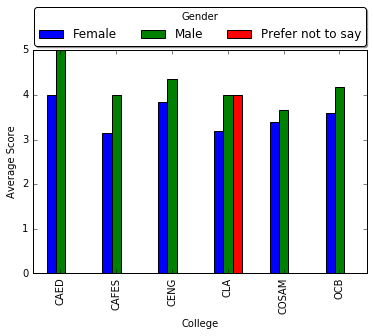

In [41]:
ax = data.groupby(['What is your major?', 'What is your gender?'])['Score'].mean().unstack().plot(kind='bar')
_ = ax.set_xlabel('College')
_ = ax.set_ylabel('Average Score')
_ = ax.legend(loc='upper center', bbox_to_anchor = (0.5, 1.22),ncol=3, fancybox=True, shadow=True, title = "Gender")

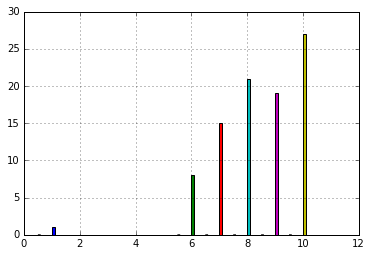

In [42]:
ax = data.groupby('In your opinion, how important is financial literacy?')['In your opinion, how important is financial literacy?'].hist()


In [53]:
females = data.groupby(['What is your major?', 'What is your gender?'])['Score'].mean().unstack()['Female'].sort_values()
females

What is your major?
CAFES    3.142857
CLA      3.200000
COSAM    3.400000
OCB      3.600000
CENG     3.833333
CAED     4.000000
Name: Female, dtype: float64

In [54]:
males = data.groupby(['What is your major?', 'What is your gender?'])['Score'].mean().unstack()['Male'].sort_values()
males

What is your major?
COSAM    3.666667
CAFES    4.000000
CLA      4.000000
OCB      4.166667
CENG     4.352941
CAED     5.000000
Name: Male, dtype: float64

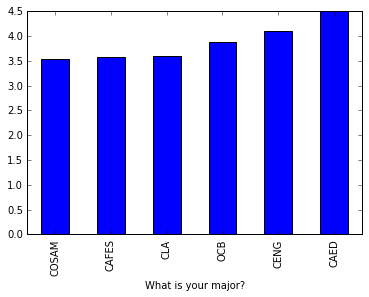

In [58]:
((males + females)/2).sort_values().plot('bar')

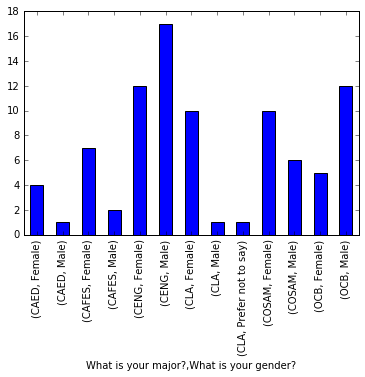

In [64]:
data.groupby(['What is your major?', 'What is your gender?'])['What is your gender?'].count().plot('bar')